In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/House_1_cleaned_sampled.csv', parse_dates=['Time'])
df.set_index('Time', inplace=True)

df.head()


,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9,active_count
Time,,,,,,,,,,,,
2013-10-09 13:06:17,1381323977,523,74,0,69,0,0,0,0,0,1,3
2013-10-09 13:07:18,1381324038,539,74,0,69,0,0,0,0,0,1,3
2013-10-09 13:07:59,1381324079,561,74,0,69,0,0,0,0,0,1,3
2013-10-09 13:08:27,1381324107,561,73,0,69,0,0,0,0,0,1,3
2013-10-09 14:11:32,1381327892,445,12,0,71,0,0,0,0,0,1,3


In [2]:
appliance_name_map = {
    'Appliance1': 'Fridge',
    'Appliance2': 'Freezer',
    'Appliance3': 'Washer Dryer',
    'Appliance4': 'Dishwasher',
    'Appliance5': 'Computer',
    'Appliance6': 'Television',
    'Appliance7': 'Microwave',
    'Appliance8': 'Kettle',
    'Appliance9': 'Toaster'
}


In [3]:
df.rename(columns=appliance_name_map, inplace=True)
df.head()


,Unix,Aggregate,Fridge,Freezer,Washer Dryer,Dishwasher,Computer,Television,Microwave,Kettle,Toaster,active_count
Time,,,,,,,,,,,,
2013-10-09 13:06:17,1381323977,523,74,0,69,0,0,0,0,0,1,3
2013-10-09 13:07:18,1381324038,539,74,0,69,0,0,0,0,0,1,3
2013-10-09 13:07:59,1381324079,561,74,0,69,0,0,0,0,0,1,3
2013-10-09 13:08:27,1381324107,561,73,0,69,0,0,0,0,0,1,3
2013-10-09 14:11:32,1381327892,445,12,0,71,0,0,0,0,0,1,3


In [4]:
appliance_cols = list(appliance_name_map.values())
appliance_cols


['Fridge',
 'Freezer',
 'Washer Dryer',
 'Dishwasher',
 'Computer',
 'Television',
 'Microwave',
 'Kettle',
 'Toaster']

C:\Users\keert\AppData\Local\Temp\ipykernel_17340\3327414341.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_consumption = df['Aggregate'].resample('H').mean()


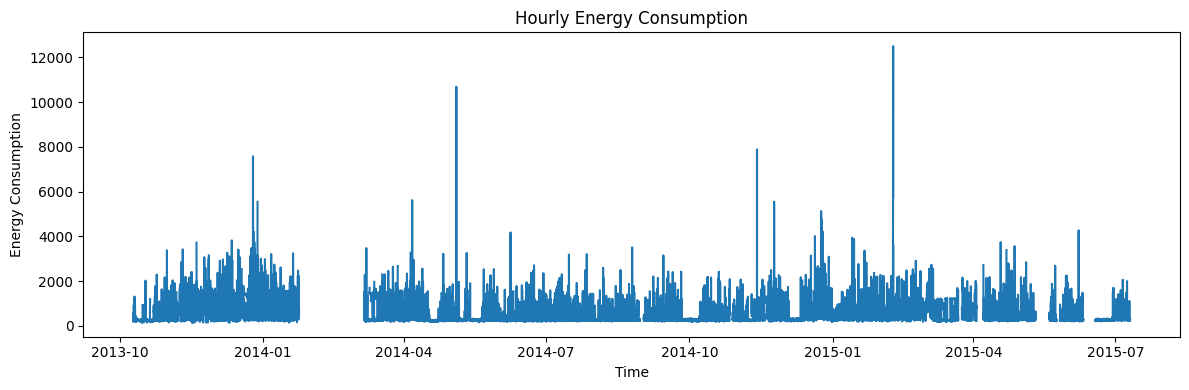

In [5]:
hourly_consumption = df['Aggregate'].resample('H').mean()

plt.figure(figsize=(12,4))
plt.plot(hourly_consumption)
plt.title("Hourly Energy Consumption")
plt.xlabel("Time")
plt.ylabel("Energy Consumption")
plt.tight_layout()
plt.show()


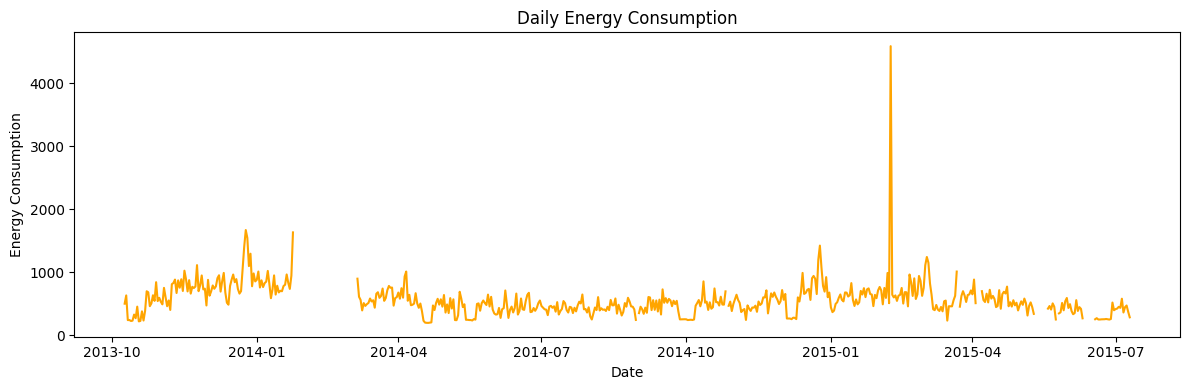

In [6]:
daily_consumption = df['Aggregate'].resample('D').mean()

plt.figure(figsize=(12,4))
plt.plot(daily_consumption, color='orange')
plt.title("Daily Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Energy Consumption")
plt.tight_layout()
plt.show()


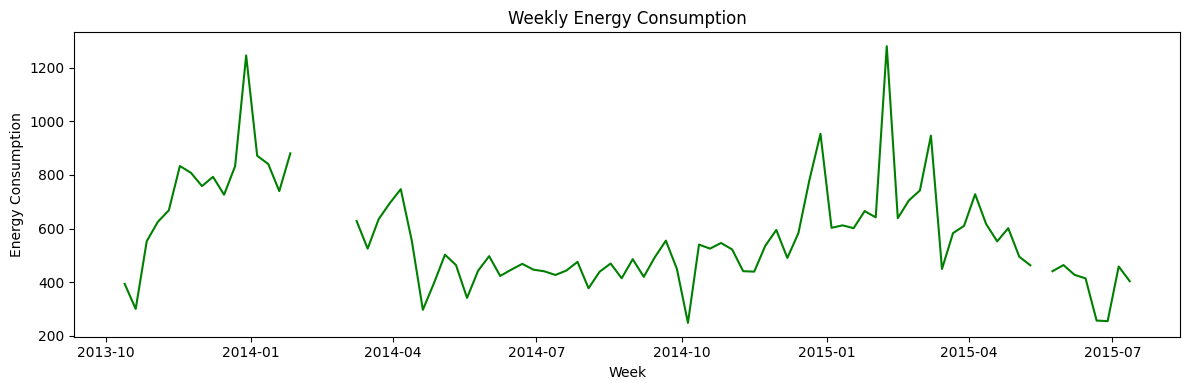

In [7]:
weekly_consumption = df['Aggregate'].resample('W').mean()

plt.figure(figsize=(12,4))
plt.plot(weekly_consumption, color='green')
plt.title("Weekly Energy Consumption")
plt.xlabel("Week")
plt.ylabel("Energy Consumption")
plt.tight_layout()
plt.show()


C:\Users\keert\AppData\Local\Temp\ipykernel_17340\4144519633.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_consumption = df['Aggregate'].resample('M').mean()


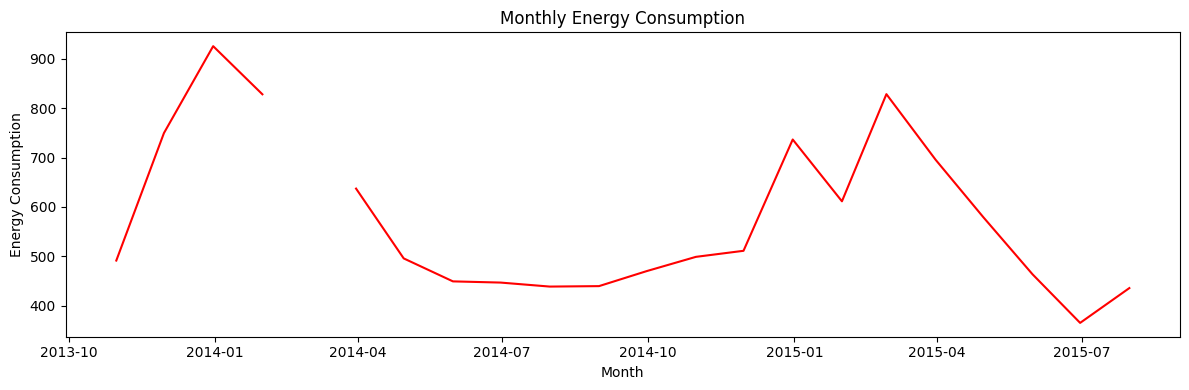

In [8]:
monthly_consumption = df['Aggregate'].resample('M').mean()

plt.figure(figsize=(12,4))
plt.plot(monthly_consumption, color='red')
plt.title("Monthly Energy Consumption")
plt.xlabel("Month")
plt.ylabel("Energy Consumption")
plt.tight_layout()
plt.show()


In [9]:
appliance_mean_usage = df[appliance_cols].mean()
appliance_mean_usage


Fridge          32.932526
Freezer         28.489108
Washer Dryer    48.568178
Dishwasher       3.984232
Computer        21.884650
Television      21.598789
Microwave        5.206333
Kettle          11.611243
Toaster         48.208360
dtype: float64

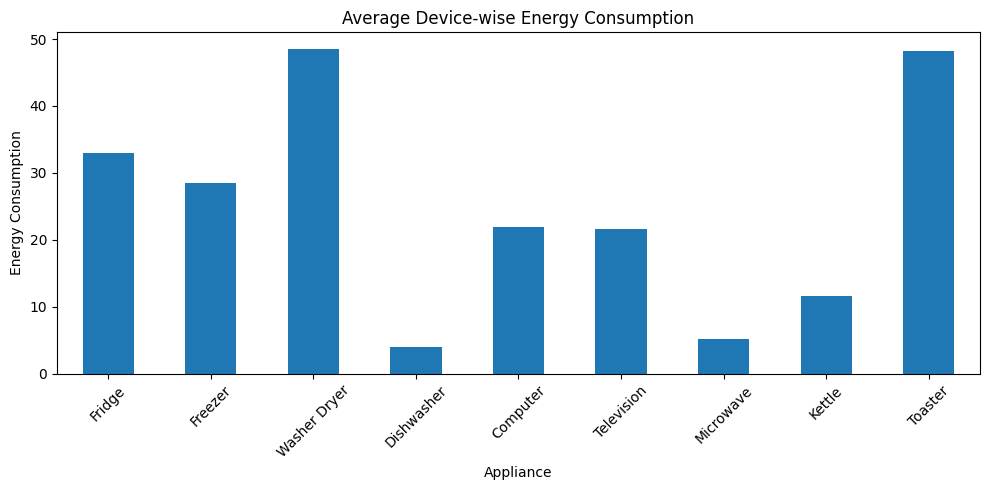

In [10]:
plt.figure(figsize=(10,5))
appliance_mean_usage.plot(kind='bar')
plt.title("Average Device-wise Energy Consumption")
plt.xlabel("Appliance")
plt.ylabel("Energy Consumption")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
def smart_energy_suggestions(df, appliance_cols):
    suggestions = []

    # Overall usage check
    if df['Aggregate'].mean() > df['Aggregate'].quantile(0.75):
        suggestions.append(
            "Overall energy usage is high. Consider reducing consumption during peak hours."
        )

    # Appliance-wise usage check
    for appliance in appliance_cols:
        if df[appliance].mean() > df[appliance].quantile(0.75):
            suggestions.append(
                f"High energy usage detected for {appliance}. Consider optimizing its usage."
            )

    return suggestions


In [12]:
energy_tips = smart_energy_suggestions(df, appliance_cols)

for tip in energy_tips:
    print("•", tip)


• Overall energy usage is high. Consider reducing consumption during peak hours.
• High energy usage detected for Dishwasher. Consider optimizing its usage.
• High energy usage detected for Computer. Consider optimizing its usage.
• High energy usage detected for Television. Consider optimizing its usage.
• High energy usage detected for Microwave. Consider optimizing its usage.
• High energy usage detected for Toaster. Consider optimizing its usage.
